In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True)

In [5]:
df.shape

(200000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 9.9+ MB


In [7]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)

In [9]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)

In [10]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [12]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],errors='coerce')

In [13]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [14]:
df=df.assign(
        hour=df['pickup_datetime'].dt.hour,
    day=df['pickup_datetime'].dt.day,
    month=df['pickup_datetime'].dt.month,
    year=df['pickup_datetime'].dt.year,
    dayofweek=df['pickup_datetime'].dt.dayofweek
        
)

In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [16]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [17]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

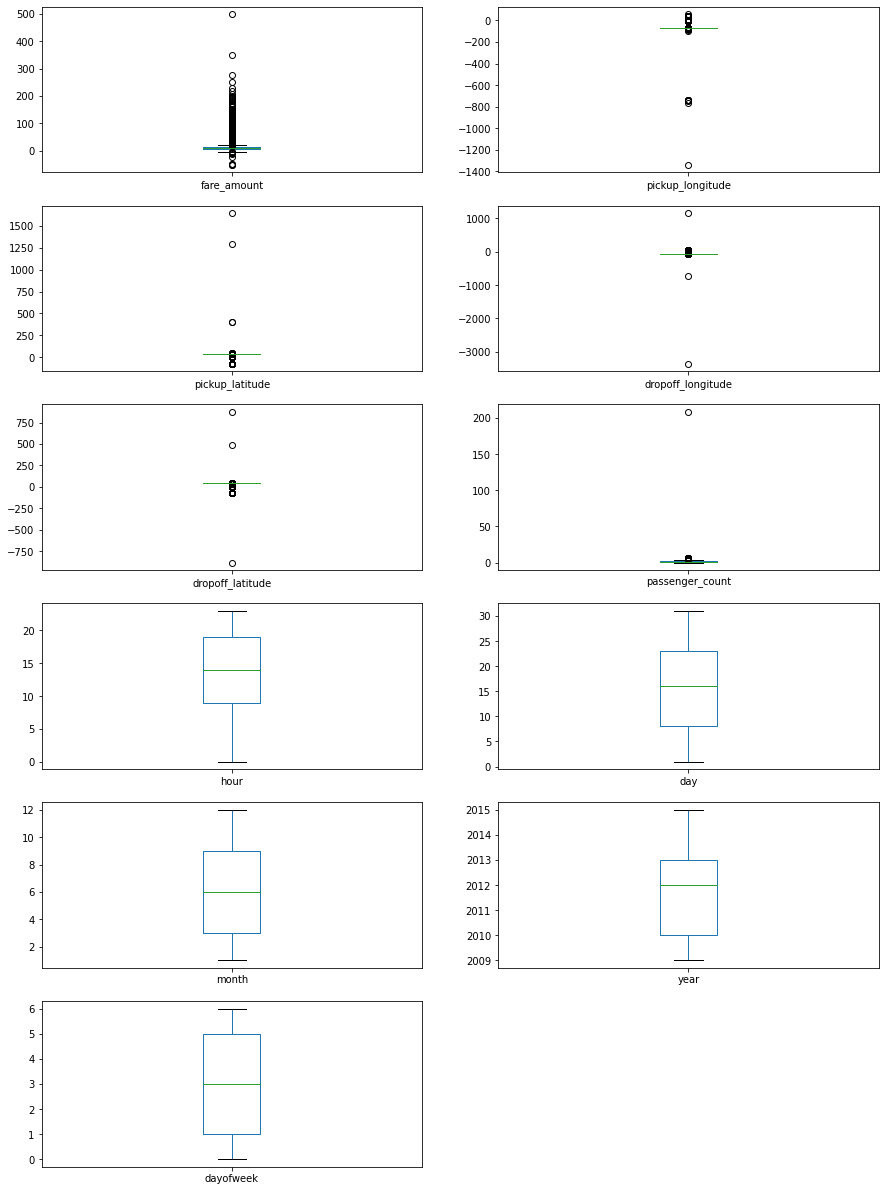

In [18]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,25))

In [19]:
#Remove Outliers
# 1.passenger count
df=df[(df['passenger_count']>0) & (df['passenger_count']<10)]
#2.fare_amount
df=df[df['fare_amount']>0]

In [20]:
df = df[
    (df['pickup_longitude']>=-180) & (df['pickup_longitude']<=180) & 
    (df['dropoff_longitude']>=-180) & (df['dropoff_longitude']<=180) &
    (df['pickup_latitude']>=-90) & (df['pickup_latitude']<=90) &
    (df['dropoff_latitude']>=-90) & (df['dropoff_latitude']<=90)
]

In [21]:
df.shape

(199256, 11)

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

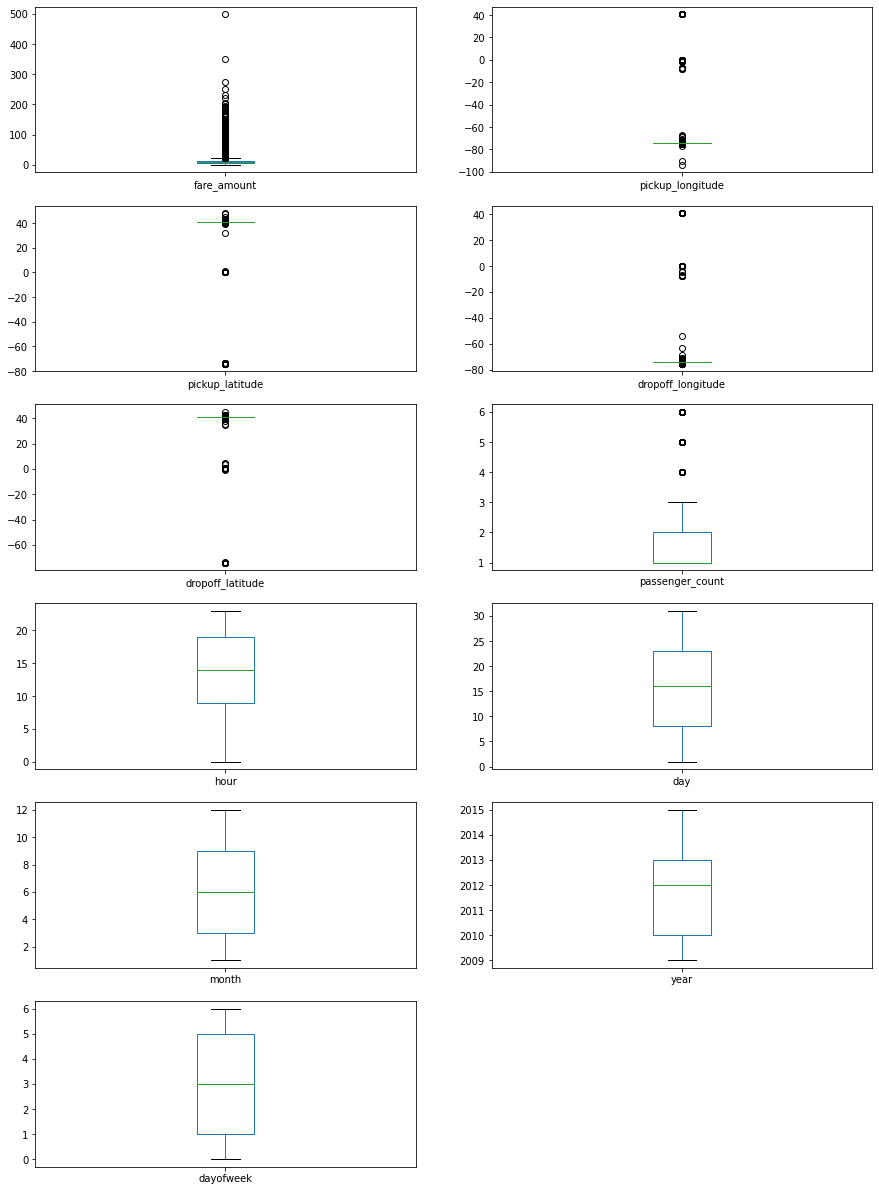

In [22]:
# After removing outliers
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,25))

In [23]:
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199256 entries, 0 to 199255
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              199256 non-null  int64  
 1   fare_amount        199256 non-null  float64
 2   pickup_longitude   199256 non-null  float64
 3   pickup_latitude    199256 non-null  float64
 4   dropoff_longitude  199256 non-null  float64
 5   dropoff_latitude   199256 non-null  float64
 6   passenger_count    199256 non-null  int64  
 7   hour               199256 non-null  int64  
 8   day                199256 non-null  int64  
 9   month              199256 non-null  int64  
 10  year               199256 non-null  int64  
 11  dayofweek          199256 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 18.2 MB


In [24]:
import haversine as hs
travel_distance=[]
for pos in range(len(df['pickup_latitude'])):
    lat1=df['pickup_latitude'][pos]
    lat2=df['dropoff_latitude'][pos]
    long1=df['pickup_longitude'][pos]
    long2=df['dropoff_longitude'][pos]
    loc1 = (lat1, long1)
    loc2=(lat2,long2)
    dist=hs.haversine(loc1,loc2)
    travel_distance.append(dist)

df['distance_travel']=pd.DataFrame(travel_distance)

In [25]:
df


,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance_travel
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683325
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457593
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036384
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661686
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199251,199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6,0.112210
199252,199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4,1.875053
199253,199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0,12.850337
199254,199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2,3.539720


In [26]:
df.corr()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance_travel
index,1.000000,-0.001676,-0.000429,0.000534,0.000132,0.000522,0.005013,0.001364,0.001063,0.002257,-0.001141,-0.002213,-0.001313
fare_amount,-0.001676,1.000000,0.011597,-0.011521,0.011980,-0.012358,0.010184,-0.021482,0.001438,0.023477,0.118513,0.007222,0.025615
pickup_longitude,-0.000429,0.011597,1.000000,-0.978956,0.950317,-0.937159,-0.000512,0.001563,0.005699,-0.003535,0.009740,0.002196,0.163156
pickup_latitude,0.000534,-0.011521,-0.978956,1.000000,-0.937224,0.958727,-0.000824,-0.001507,-0.009138,0.004688,-0.012042,-0.004045,-0.141658
dropoff_longitude,0.000132,0.011980,0.950317,-0.937224,1.000000,-0.979599,-0.000243,0.001259,0.004494,-0.001972,0.010163,0.002108,0.139208
dropoff_latitude,0.000522,-0.012358,-0.937159,0.958727,-0.979599,1.000000,-0.001614,-0.001586,-0.008062,0.003403,-0.012423,-0.003763,-0.123156
passenger_count,0.005013,0.010184,-0.000512,-0.000824,-0.000243,-0.001614,1.000000,0.014496,0.002212,0.008658,0.004871,0.035569,-0.001482
hour,0.001364,-0.021482,0.001563,-0.001507,0.001259,-0.001586,0.014496,1.000000,0.004865,-0.004038,0.002176,-0.086642,-0.000059
day,0.001063,0.001438,0.005699,-0.009138,0.004494,-0.008062,0.002212,0.004865,1.000000,-0.017554,-0.012093,0.005712,-0.001752
month,0.002257,0.023477,-0.003535,0.004688,-0.001972,0.003403,0.008658,-0.004038,-0.017554,1.000000,-0.115519,-0.009020,-0.000526


<AxesSubplot:>

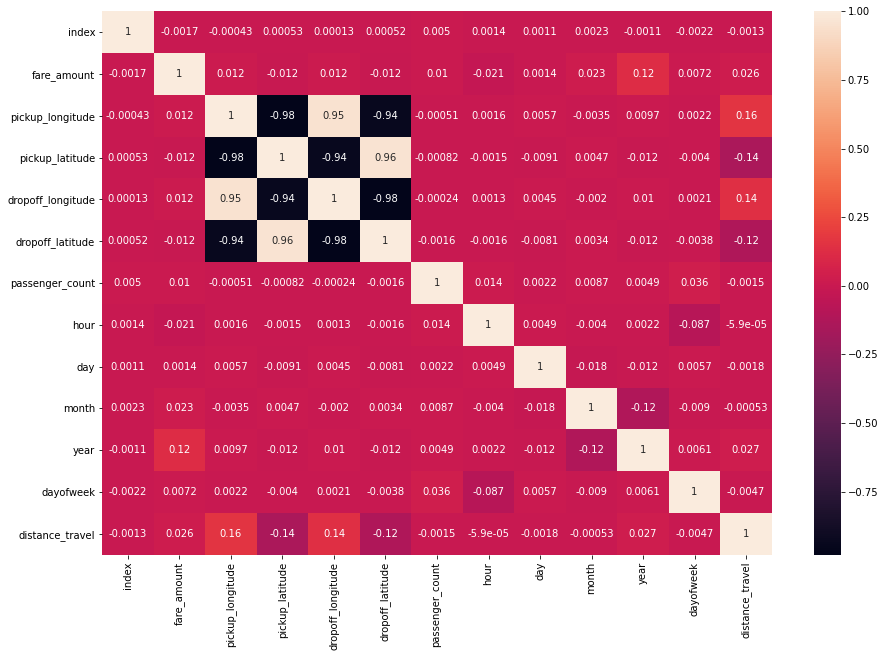

In [27]:
fig, axis = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [28]:
x=df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','distance_travel']]
y=df['fare_amount']

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lin=LinearRegression()

In [33]:
clf=lin.fit(x_train,y_train)

In [34]:
y_pred=clf.predict(x_test)

In [35]:
y_pred

array([12.45840442, 13.58260817, 10.16145583, ..., 13.24933856,
       11.98132538, 11.03118465])

In [36]:
y_test

124647     8.00
43451     57.54
137984     5.30
87555     72.50
112235     7.50
          ...  
81653     17.50
124806     3.30
52816     22.50
38199      4.90
146207     6.10
Name: fare_amount, Length: 49814, dtype: float64

In [37]:
clf.score(x_test,y_test)*100

1.7231623138624586

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_test,y_pred)

0.017231623138624586

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
mse=mean_squared_error(y_test,y_pred)

In [42]:
mse

92.08224439634168

In [43]:
rmse=np.sqrt(mse)
rmse

9.595949374415316

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf=RandomForestRegressor(n_estimators=100,random_state=0)

In [46]:
clf2=rf.fit(x_train,y_train)

MemoryError: could not allocate 12582912 bytes

In [ ]:
y_pred=clf2.predict(x_test)
y_pred

In [ ]:
y_test

In [ ]:
clf2.score(x_test,y_test)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
mse=mean_squared_error(y_test,y_pred)

In [ ]:
mse

In [ ]:
rmse=np.sqrt(mse)

In [ ]:
rmse